# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers.columns
customers.head()
customers["Channel"].unique()
# Only two Channels
customers["Region"].unique()
# Dataset shows 3 Regions data
# no categorical data to convert
customers.isna().sum()
#no missing data to remove
customers.dtypes
# All numerical Values
customers.describe()
# All have standard deviation and a great difference between min and max
customers.skew()
# Not quite the best distribution given the skewness

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

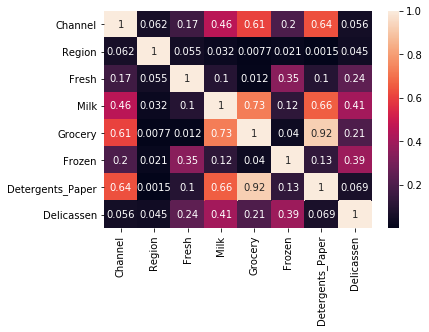

In [4]:
import seaborn as sns

corr_matrix = customers.corr().abs()
corr_matrix
sns.heatmap(corr_matrix,annot=True)

# theres correlation between Grocery and Detergents_Paper
# Grocery and Milk
# Detergeants_Paper and Milk, but not a strong one

In [5]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper
# not enought information to dispense any data yet

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,NaN,0.062028,0.169172,0.460720,0.608792,0.202046,0.636026,0.056011
Region,NaN,NaN,0.055287,0.032288,0.007696,0.021044,0.001483,0.045212
Fresh,NaN,NaN,NaN,0.100510,0.011854,0.345881,0.101953,0.244690
Milk,NaN,NaN,NaN,NaN,0.728335,0.123994,0.661816,0.406368
Grocery,NaN,NaN,NaN,NaN,NaN,0.040193,0.924641,0.205497
Frozen,NaN,NaN,NaN,NaN,NaN,NaN,0.131525,0.390947
Detergents_Paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069291
Delicassen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# outliers
from scipy import stats

z = np.abs(stats.zscore(customers))
print (z)
threshold = 3
print(np.where(z > 3))
# seems that outliers are located on first and second column
customers_new=customers[(z<3).all(axis=1)]
customers_new
# Outliers dropped

[[1.44865163 0.59066829 0.05293319 ... 0.58936716 0.04356873 0.06633906]
 [1.44865163 0.59066829 0.39130197 ... 0.27013618 0.08640684 0.08915105]
 [1.44865163 0.59066829 0.44702926 ... 0.13753572 0.13323164 2.24329255]
 ...
 [1.44865163 0.59066829 0.20032554 ... 0.54337975 2.51121768 0.12145607]
 [0.69029709 0.59066829 0.13538389 ... 0.41944059 0.56977032 0.21304614]
 [0.69029709 0.59066829 0.72930698 ... 0.62009417 0.50488752 0.52286938]]
(array([ 23,  23,  39,  47,  47,  47,  56,  56,  61,  61,  61,  65,  65,
        71,  85,  85,  85,  86,  86,  87,  92,  93, 103, 103, 125, 181,
       181, 183, 183, 183, 196, 211, 211, 211, 216, 251, 258, 259, 284,
       325, 333, 333, 413]), array([3, 7, 2, 3, 4, 6, 3, 6, 3, 4, 6, 4, 6, 7, 3, 4, 6, 3, 6, 7, 6, 5,
       2, 5, 2, 2, 3, 3, 5, 7, 5, 3, 4, 6, 4, 6, 2, 2, 2, 5, 4, 6, 5]))


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
customers_new = pd.get_dummies(customers_new, columns=["Region","Channel"])
customers_new

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2
0,12669,9656,7561,214,2674,1338,0,0,1,0,1
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1,1,0
4,22615,5410,7198,3915,1777,5185,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,0,1,1,0
436,39228,1431,764,4510,93,2346,0,0,1,1,0
437,14531,15488,30243,437,14841,1867,0,0,1,0,1
438,10290,1981,2232,1038,168,2125,0,0,1,1,0


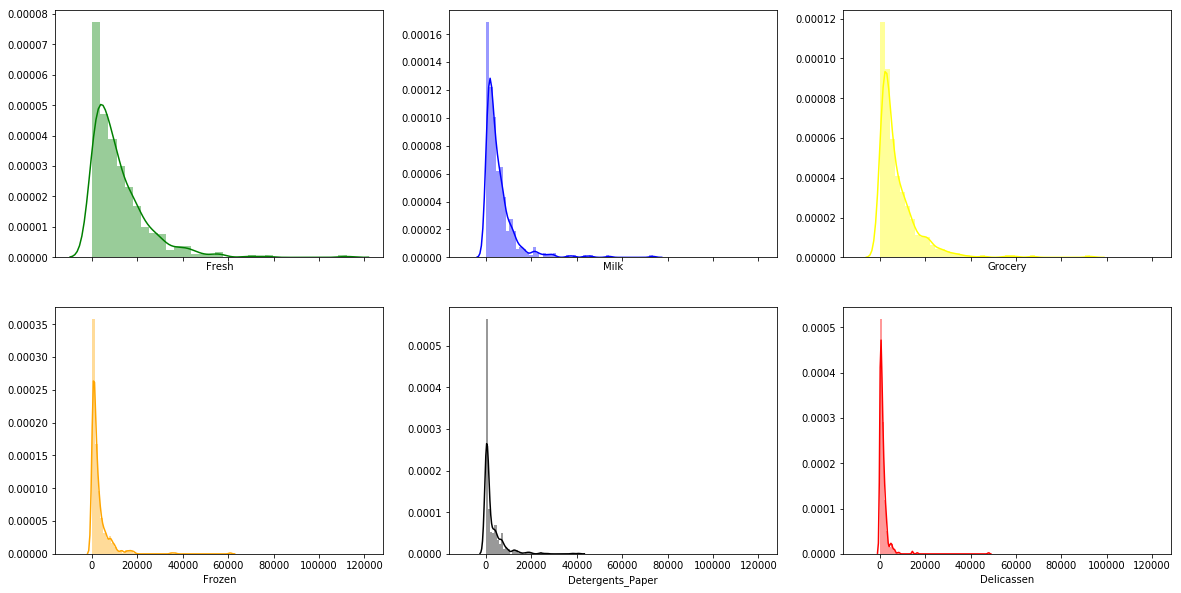

In [8]:
# Skew

f, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True)
sns.distplot( customers["Fresh"] , color="green", ax=axes[0,0])
sns.distplot( customers["Milk"] , color="blue", ax=axes[0, 1])
sns.distplot( customers["Grocery"] , color="yellow", ax=axes[0, 2])
sns.distplot( customers["Frozen"] , color="orange", ax=axes[1, 0])
sns.distplot( customers["Detergents_Paper"] , color="black", ax=axes[1, 1])
sns.distplot( customers["Delicassen"] , color="red", ax=axes[1, 2])
# all columns seems to be skewed

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [10]:
# Cleaning already been done in the previous challenge

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [12]:
from sklearn.preprocessing import StandardScaler

# Creating copy data set to do scale
customers_scale = customers_new.copy()
scaler = StandardScaler()


scaler.fit(customers_scale.iloc[:,:6])

# transforming data with transform function

customers_scale.iloc[:,:6] = scaler.transform(customers_scale.iloc[:,:6])
customers_scale.head()

/usr/lib/python3/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/fabian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2
0,0.199569,1.051409,0.115837,-0.801844,0.093798,0.082291,0,0,1,0,1
1,-0.372655,1.085254,0.427079,-0.270462,0.286944,0.442510,0,0,1,0,1
2,-0.444438,0.865042,0.134911,-0.049739,0.356526,5.432937,0,0,1,0,1
3,0.260340,-0.807866,-0.402125,1.322997,-0.582369,0.452379,0,0,1,1,0
4,1.213706,0.118255,0.059543,0.468598,-0.186092,3.246130,0,0,1,0,1


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2).fit(customers_scale)
customers_scale["labels"] = kmeans.labels_

Count the values in `labels`.

In [20]:
customers_scale["labels"].value_counts()

0    300
1    114
Name: labels, dtype: int64

In [35]:
# in orther to study the data by kmeans I will proceed to work with the following
customers_scale[customers_scale["labels"] == 0]
customers_new["labels"] = customers_scale["labels"]
customers_new.head()

pivot_customerA=pd.pivot_table(customers_new, 
                               index = ['labels'], 
                               values = ['Fresh', 'Milk','Grocery','Frozen', 
                                       'Detergents_Paper', 'Delicassen'], aggfunc=np.sum)
pivot_customerA


pivot_customerB=pd.pivot_table(customers_new, 
                               index = ['labels'], 
                               values = ['Channel_1','Channel_2','Region_1','Region_2','Region_3'],aggfunc=np.sum)
pivot_customerB

pivot_table1 = pd.concat([pivot_customerA,pivot_customerB],axis=1)
pivot_table1.T

# in this table we can observe that most of the clients are concentrated in label 0 channel 1, 
# but in label 1 most of the clients concentrate in channel 2, and that the region 3 gets more than 
# 250% of the customers spends compared to region 1 and 2.

labels,0,1
Delicassen,312753.0,199754.0
Detergents_Paper,245912.0,736673.0
Fresh,3653098.0,781570.0
Frozen,883502.0,172156.0
Grocery,1104701.0,1716313.0
Milk,868228.0,1148747.0
Channel_1,273.0,11.0
Channel_2,27.0,103.0
Region_1,54.0,17.0
Region_2,31.0,14.0


Text(0, 0.5, 'Sum of squared distance')

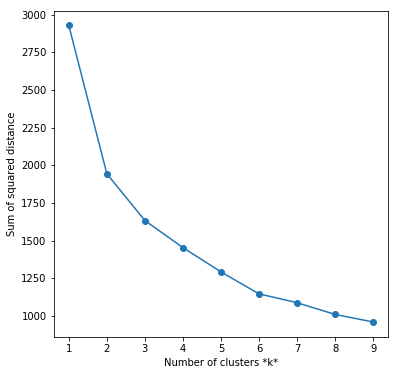

In [37]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    kmea = KMeans(n_clusters=k)
    kmea.fit(customers_scale)
    sse.append(kmea.inertia_)

# sse Plot against k
plt.figure(figsize = (6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [38]:
# we can see that between the second and third clusters is where the data shows to flatten out

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [39]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.6).fit(customers_scale)
customers_scale["labels_DBSCAN"] = clustering.labels_

Count the values in `labels_DBSCAN`.

In [40]:
customers_scale["labels_DBSCAN"].value_counts()

-1    309
 0     96
 1      9
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

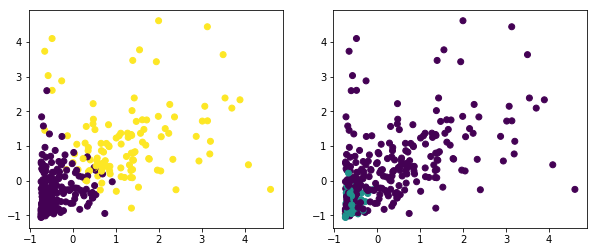

In [41]:
x = customers_scale.Detergents_Paper
y = customers_scale.Milk

def plot_sales(x,y):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.scatter(x, y, c = customers_scale.labels)
    plt.subplot(1,2,2)
    plt.scatter(x, y, c = customers_scale.labels_DBSCAN)
    plt.show()

plot_sales(x,y)

# seems that k-means is better for this 

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

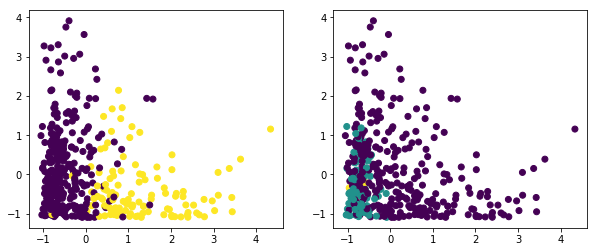

In [42]:
x = customers_scale.Grocery
y = customers_scale.Fresh

def plot_sales(x,y):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.scatter(x, y, c = customers_scale.labels)
    plt.subplot(1,2,2)
    plt.scatter(x, y, c = customers_scale.labels_DBSCAN)
    plt.show()

plot_sales(x,y)

# k-means is better for this one too

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

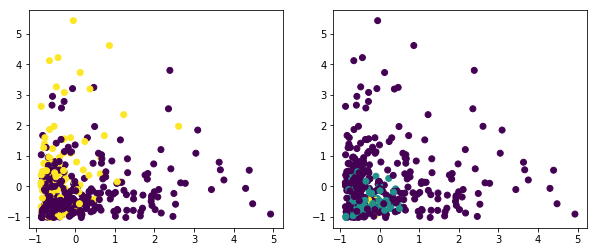

In [44]:
x = customers_scale.Frozen
y = customers_scale.Delicassen

def plot_sales(x,y):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.scatter(x, y, c = customers_scale.labels)
    plt.subplot(1,2,2)
    plt.scatter(x, y, c = customers_scale.labels_DBSCAN)
    plt.show()

plot_sales(x,y)

# not sure about this one, semms like neither of the two 

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [45]:
display(customers_new.groupby("labels").mean())
customers_new["labels_DBSCAN"] = customers_scale["labels_DBSCAN"]
customers_new.groupby("labels_DBSCAN").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2
labels,,,,,,,,,,,
0,12176.993333,2894.093333,3682.336667,2945.006667,819.706667,1042.51000,0.180000,0.103333,0.716667,0.910000,0.090000
1,6855.877193,10076.728070,15055.377193,1510.140351,6462.043860,1752.22807,0.149123,0.122807,0.728070,0.096491,0.903509


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2,labels
labels_DBSCAN,,,,,,,,,,,,
-1,11736.721683,5941.38835,8391.951456,2895.566343,3041.064725,1446.844660,0.200647,0.145631,0.653722,0.579288,0.420712,0.368932
0,7796.177083,1761.25000,2220.614583,1533.572917,423.291667,641.260417,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
1,6620.888889,1334.00000,1635.777778,1522.777778,251.111111,430.111111,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


Which algorithm appears to perform better?

In [46]:
# In my opinion K-means performs better with n_clusters=2

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here